In [1]:
# imports l'analyse exploratoire
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.metrics import silhouette_score

# Ignorer les warnings
import warnings

In [2]:
warnings.simplefilter(action='ignore', category=FutureWarning)

df = pd.read_csv('marketing_campaign.csv', sep='\t')

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df = df.dropna()
print("Nombre de lignes et de colonnes dans le dataset après suppression des valeurs manquantes : ", len(df))

Nombre de lignes et de colonnes dans le dataset après suppression des valeurs manquantes :  2216


In [6]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], dayfirst=True)

dates = [i.date() for i in df["Dt_Customer"]]

print("Date du client le plus ancien : ", min(dates))
print("Date du client le plus récent : ", max(dates))

max_date = max(dates)
jours = [(max_date - date).days for date in dates]

df["Client depuis"] = jours

Date du client le plus ancien :  2012-07-30
Date du client le plus récent :  2014-06-29


In [7]:
print("Nombre de catégories dans la variable Marital_Status : ", df["Marital_Status"].value_counts())

Nombre de catégories dans la variable Marital_Status :  Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


In [8]:
print("Nombre de catégories dans la variable Education : ", df["Education"].value_counts())

Nombre de catégories dans la variable Education :  Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64


In [9]:
df["Âge"] = 2024 - df["Year_Birth"]

In [10]:
df["Dépenses"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]

In [11]:
df["Situation logement"] = df["Marital_Status"].replace({"Married": "Plusieurs", "Together": "Plusieurs", "Divorced": "Seul", "Widow": "Seul", "Single": "Seul", "Absurd": "Seul", "YOLO":"Seul"})

In [12]:
print(df["Situation logement"])

0            Seul
1            Seul
2       Plusieurs
3       Plusieurs
4       Plusieurs
          ...    
2235    Plusieurs
2236    Plusieurs
2237         Seul
2238    Plusieurs
2239    Plusieurs
Name: Situation logement, Length: 2216, dtype: object


In [13]:
df["Enfants"] = df["Kidhome"] + df["Teenhome"]

In [14]:
# Replace "Seul" with 1 and "Plusieurs" with 2 in the "Situation logement" column
df["Situation logement"] = df["Situation logement"].replace({"Seul": 1, "Plusieurs": 2})

df["Situation logement"] = pd.to_numeric(df["Situation logement"], errors='coerce')

# Add the numerical values of "Situation logement" to the "Enfants" column
df["Taille foyer"] = df["Situation logement"] + df["Enfants"]

In [15]:
df["Est Parent"] = np.where(df["Enfants"] > 0, 1, 0)

In [16]:
df["Education"] = df["Education"].replace({"Basic": "Undergraduate", "2n Cycle": "Undergraduate", "Graduation": "Graduate", "Master": "Postgraduate", "PhD": "Postgraduate"})

In [17]:
df = df.rename(columns={"MntWines": "Vin", "MntFruits": "Fruits", "MntMeatProducts": "Viande", "MntFishProducts": "Poisson", "MntSweetProducts": "Sucré", "MntGoldProds": "Or"})

clean_up = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
df = df.drop(clean_up, axis=1)

In [18]:
df.describe()

,Income,Kidhome,Teenhome,Recency,Vin,Fruits,Viande,Poisson,Sucré,Or,...,AcceptedCmp2,Complain,Response,Client depuis,Âge,Dépenses,Situation logement,Enfants,Taille foyer,Est Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2213.000000,2216.000000,2213.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.013538,0.009477,0.150271,353.521209,55.179603,607.075361,1.646182,0.947202,2.592408,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.115588,0.096907,0.357417,202.434667,11.985554,602.900476,0.478262,0.749062,0.906165,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,28.000000,5.000000,1.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,180.000000,47.000000,69.000000,1.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,355.500000,54.000000,396.500000,2.000000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,529.000000,65.000000,1048.000000,2.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,699.000000,131.000000,2525.000000,2.000000,3.000000,5.000000,1.000000


<Figure size 640x480 with 0 Axes>

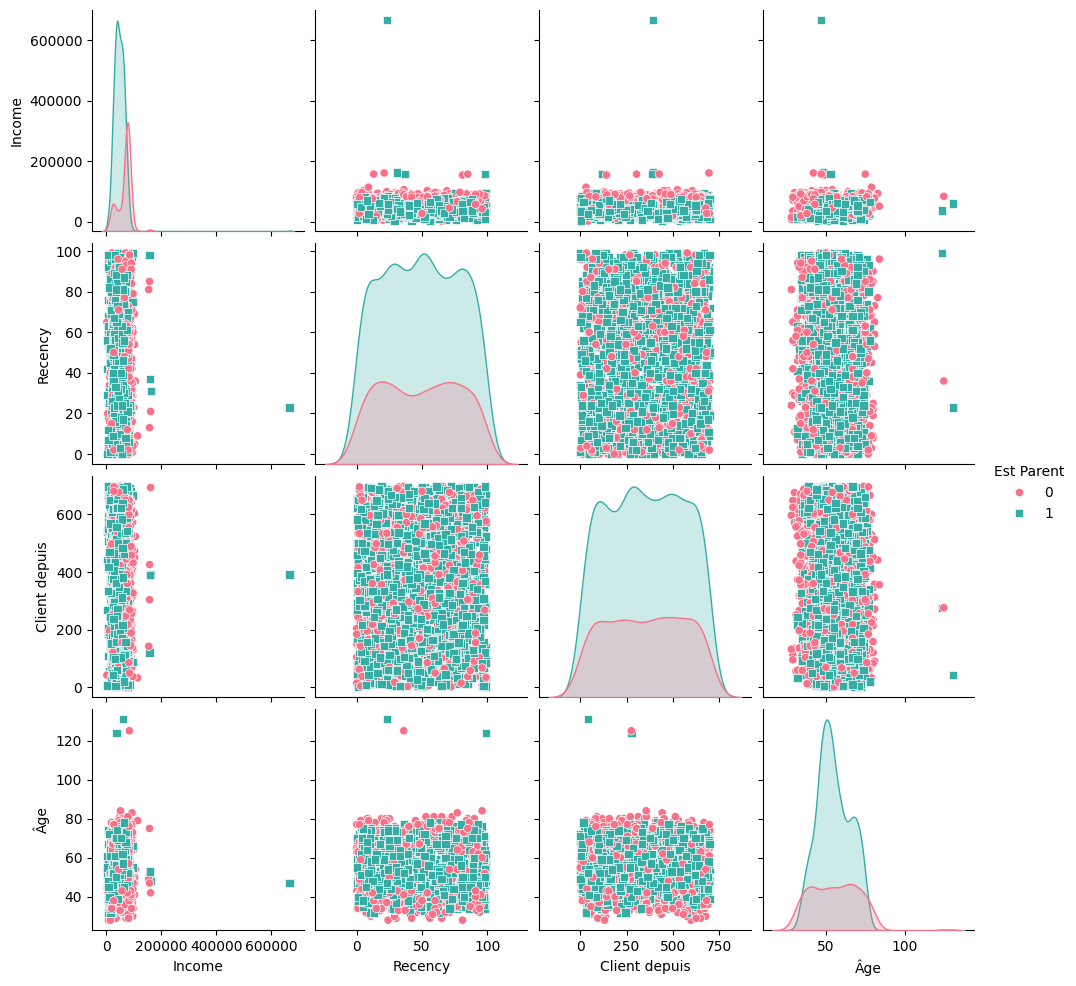

In [19]:
plot = ["Income", "Recency", "Client depuis", "Âge", "Est Parent"]
plt.figure()

sns.pairplot(df[plot], hue="Est Parent", palette="husl", markers=["o", "s"], diag_kind="kde")

plt.show()

In [20]:
df = df[(df["Âge"]<95)]
df = df[(df["Income"]<650000)]

print("Nombre de lignes et de colonnes dans le dataset après suppression des valeurs aberrantes : ", len(df))

Nombre de lignes et de colonnes dans le dataset après suppression des valeurs aberrantes :  2212


In [21]:
df.describe()

,Income,Kidhome,Teenhome,Recency,Vin,Fruits,Viande,Poisson,Sucré,Or,...,AcceptedCmp2,Complain,Response,Client depuis,Âge,Dépenses,Situation logement,Enfants,Taille foyer,Est Parent
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,...,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2209.000000,2212.000000,2209.000000,2212.000000
mean,51958.810579,0.441682,0.505877,49.019439,305.287523,26.329566,167.029837,37.648734,27.046564,43.925859,...,0.013562,0.009042,0.150542,353.714286,55.086347,607.268083,1.646446,0.947559,2.593029,0.714286
std,21527.278844,0.536955,0.544253,28.943121,337.322940,39.744052,224.254493,54.772033,41.090991,51.706981,...,0.115691,0.094678,0.357683,202.494886,11.701599,602.513364,0.478181,0.749466,0.906681,0.451856
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,28.000000,5.000000,1.000000,0.000000,1.000000,0.000000
25%,35233.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,180.000000,47.000000,69.000000,1.000000,0.000000,2.000000,0.000000
50%,51371.000000,0.000000,0.000000,49.000000,175.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,356.000000,54.000000,397.000000,2.000000,1.000000,3.000000,1.000000
75%,68487.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,529.000000,65.000000,1048.000000,2.000000,1.000000,3.000000,1.000000
max,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,699.000000,84.000000,2525.000000,2.000000,3.000000,5.000000,1.000000


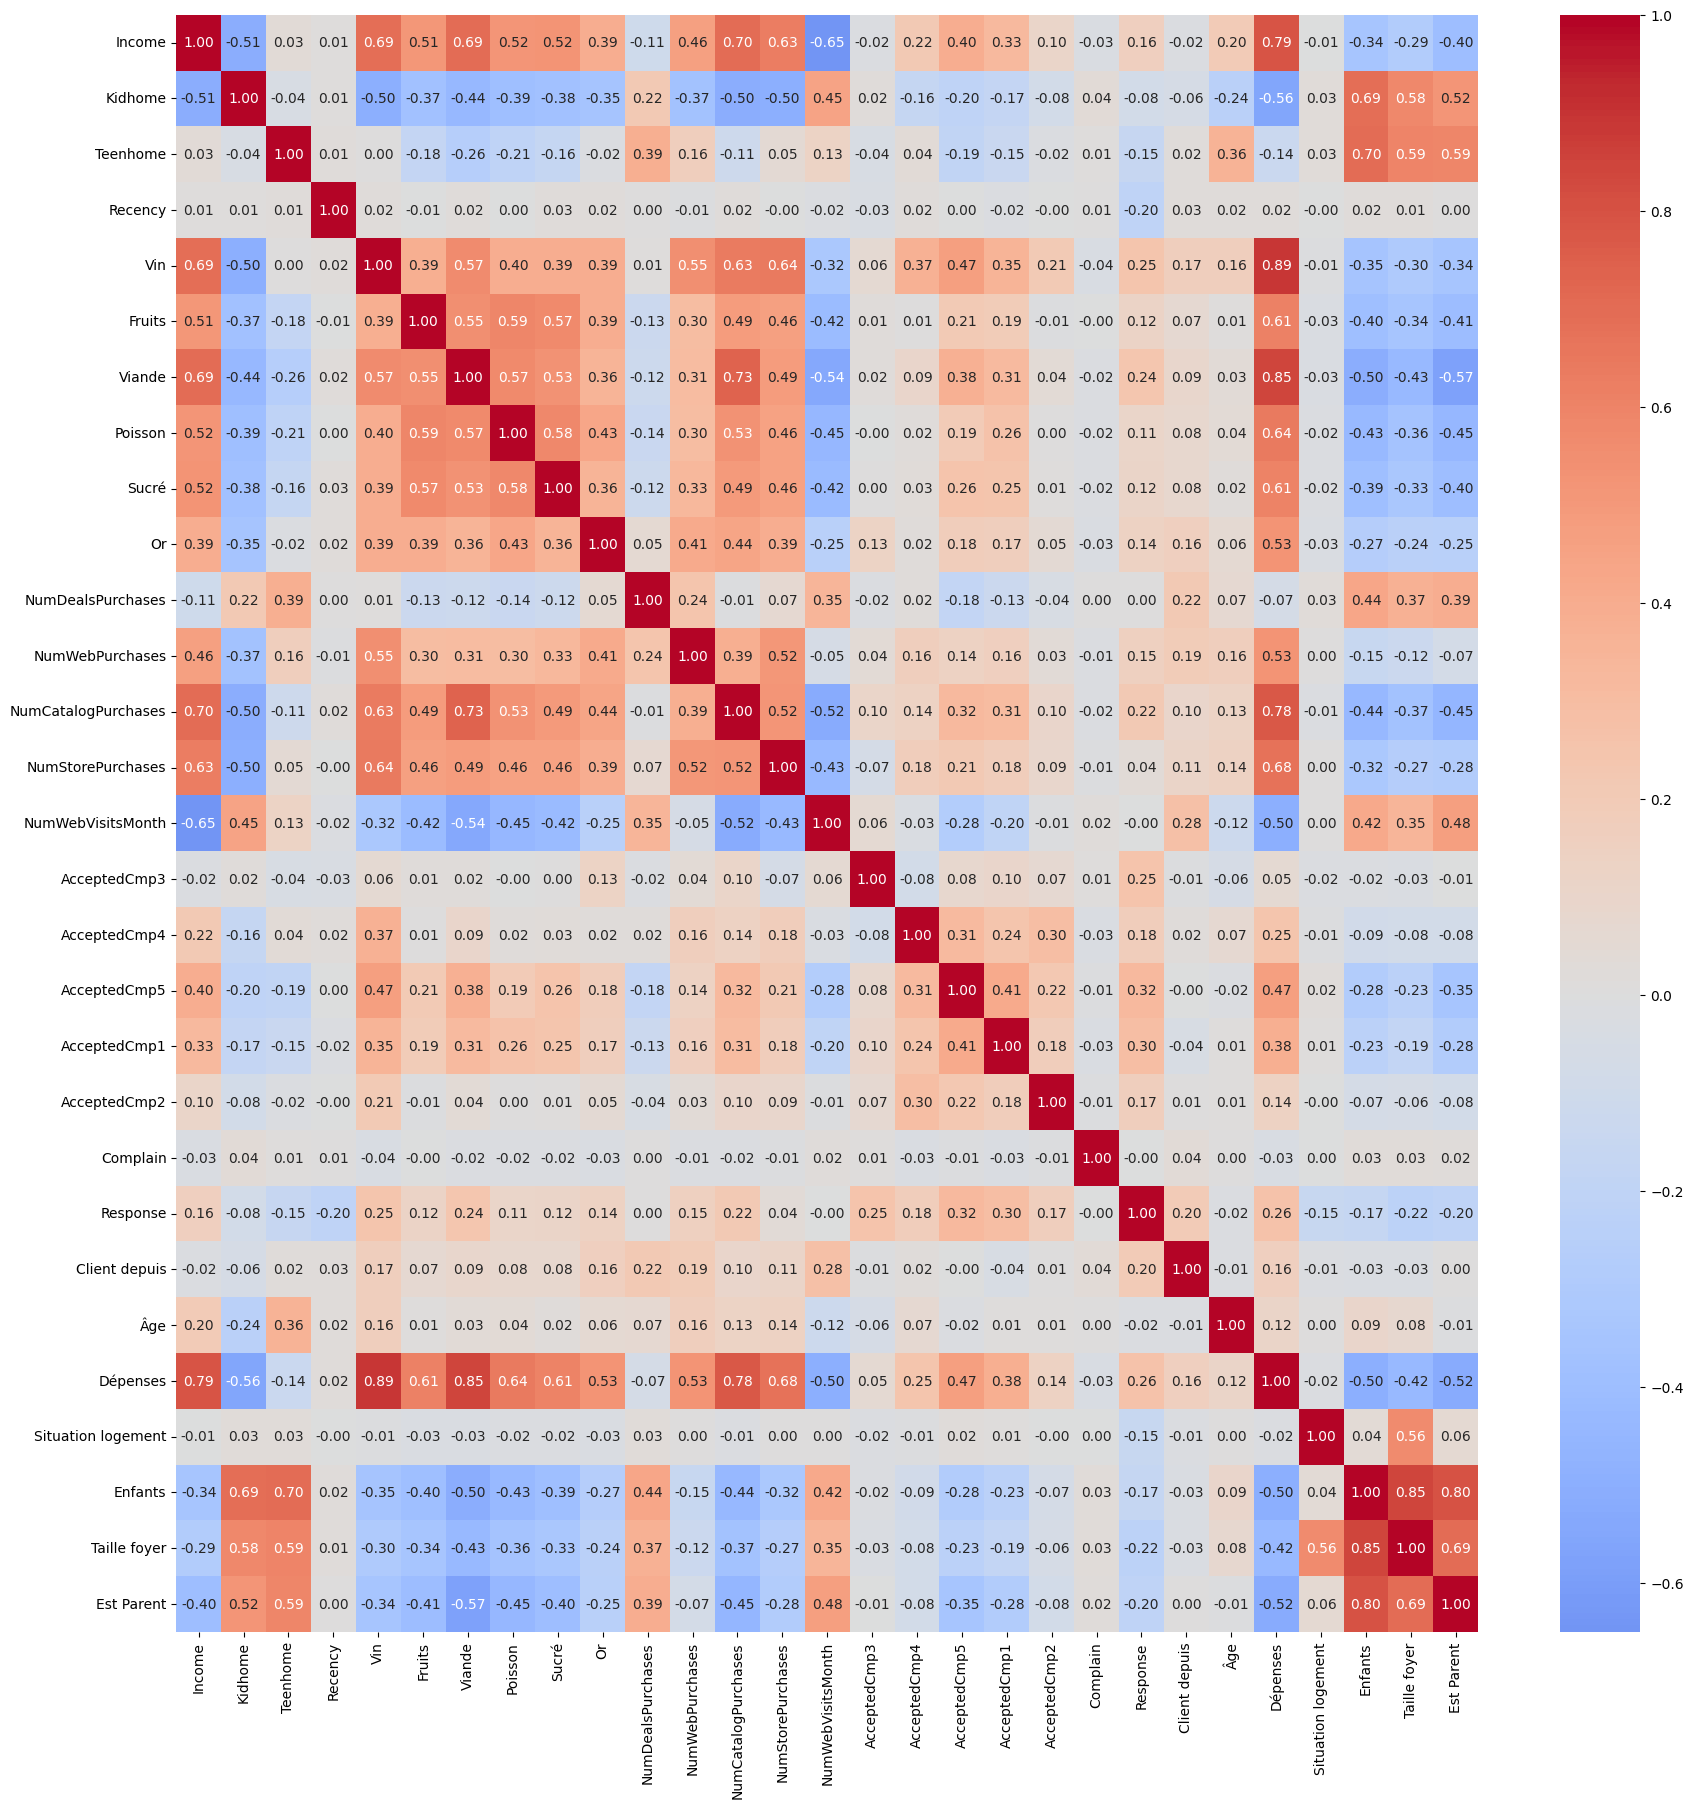

In [22]:
numeric_columns = df.select_dtypes(include=[int, float]).columns
correlation = df[numeric_columns].corr()

plt.figure(figsize=(21, 21))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.show()

### Réduction de dimension à l’aide de la sélection de feature et/ou l'analyse à facteurs multiples

Sélection des caractéristiques numériques

In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Select the numerics columns
numeric_columns = df.select_dtypes(include=[int, float]).columns
df_numeric = df[numeric_columns]
imputer = SimpleImputer(strategy='mean')
df_numeric_imputed = imputer.fit_transform(df_numeric)

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric_imputed)

# Use ACP
pca = PCA(n_components=4)  
principal_components = pca.fit_transform(df_scaled)

# Create a dataframe with main components
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4'])
df_pca['Est Parent'] = df['Est Parent'].values 


Visualisation des résultats de l'ACP

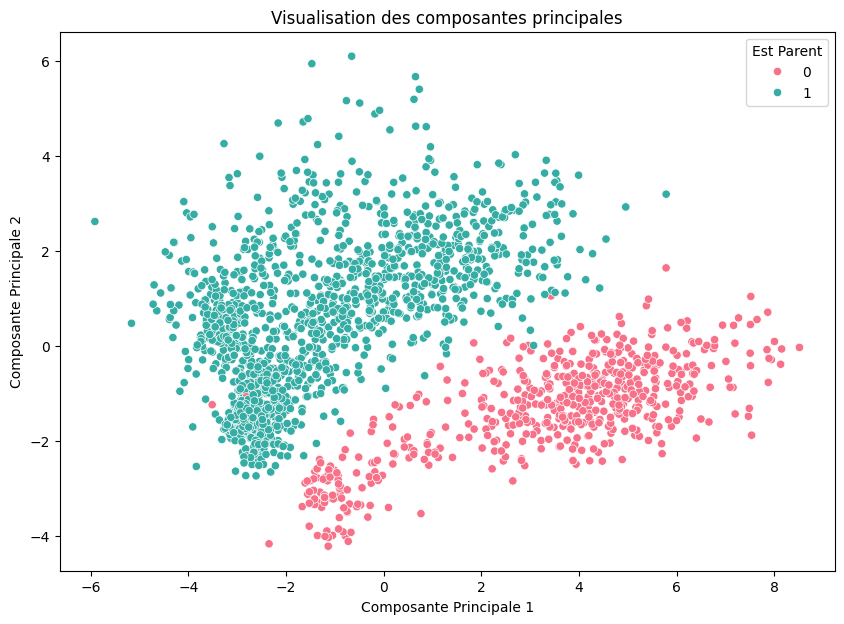

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Est Parent', palette='husl', data=df_pca)
plt.title('Visualisation des composantes principales')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.show()


Explication des composantes principales

In [25]:
# Importance des différentes caractéristiques dans chaque composante principale
pca_components = pd.DataFrame(pca.components_, columns=numeric_columns, index=['PC1', 'PC2', 'PC3', 'PC4'])
print(pca_components)

       Income   Kidhome  Teenhome   Recency       Vin    Fruits    Viande  \
PC1  0.271964 -0.233919 -0.097943  0.000542  0.256403  0.225928  0.276893   
PC2  0.162126  0.006108  0.452953  0.021253  0.211451  0.011428  0.003893   
PC3 -0.068273  0.108328 -0.095212 -0.112244  0.167322 -0.175455 -0.043331   
PC4 -0.180417  0.044502 -0.131497 -0.064642 -0.048599  0.119513  0.013172   

      Poisson     Sucré        Or  ...  AcceptedCmp2  Complain  Response  \
PC1  0.236299  0.227143  0.180904  ...      0.048359 -0.012483  0.097125   
PC2  0.003118  0.024572  0.132026  ...      0.030678  0.002441 -0.017760   
PC3 -0.174150 -0.148476 -0.043328  ...      0.362735 -0.005598  0.453378   
PC4  0.104634  0.082596  0.232133  ...     -0.201299  0.043456  0.182308   

     Client depuis       Âge  Dépenses  Situation logement   Enfants  \
PC1       0.030597  0.034623  0.314009           -0.026935 -0.238716   
PC2       0.130247  0.217212  0.133875            0.123527  0.333305   
PC3       0.14099

### Utilisation algo CAH

In [26]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

Tout d'abord je fais un échantillonnage des données afin d'alléger la charge de calcul.

In [27]:
sample_size = 500
df_sample = df_pca.sample(n = sample_size, random_state = 42)

Je fais un test de différents nombres de clusters

In [28]:
best_score = -1
best_n_components = 0
best_n_clusters = 0
best_clusters = None

J'applique le CAH sur l'échantillon

In [29]:
for n_components in [2, 3, 5, 7]:
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(df_scaled)
    df_pca = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])
    
    for n_clusters in range(2, 11):
        model = AgglomerativeClustering(n_clusters=n_clusters)
        labels = model.fit_predict(df_pca)
        score = silhouette_score(df_pca, labels)
        
        if score > best_score:
            best_score = score
            best_n_components = n_components
            best_n_clusters = n_clusters
            best_labels = labels

print(f'Best Silhouette Score: {best_score} with {best_n_components} components and {best_n_clusters} clusters')

Best Silhouette Score: 0.49943851548175283 with 2 components and 2 clusters


J'applique le clustering avec le meilleur nombre de composantes principales et de clusters

In [30]:
pca = PCA(n_components=best_n_components)
principal_components = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(best_n_components)])
df_pca['Cluster'] = best_labels

Je visualise les clusters

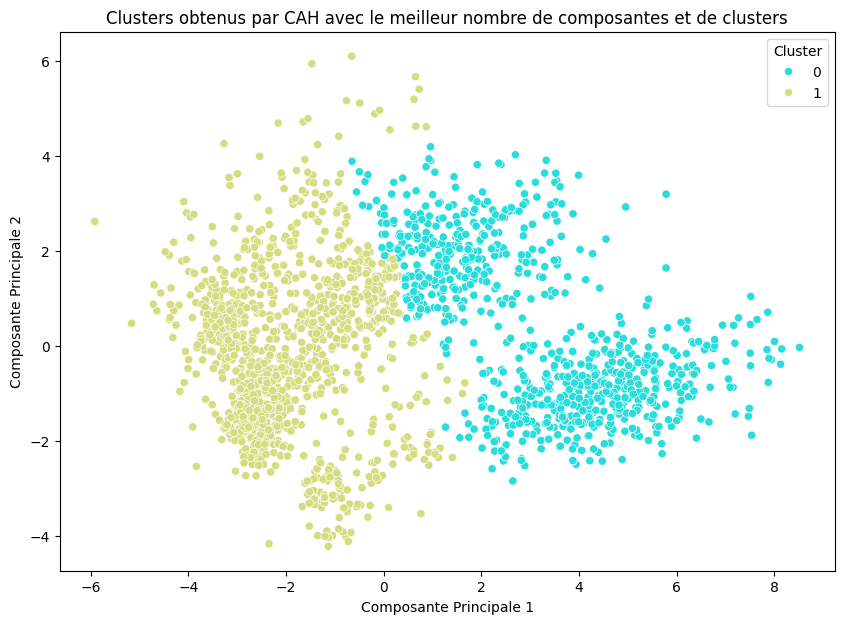

In [31]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='rainbow', data=df_pca)
plt.title('Clusters obtenus par CAH avec le meilleur nombre de composantes et de clusters')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.show()

Je crée le dendrogramme pour la visualisation de la hiérarchie des clusters

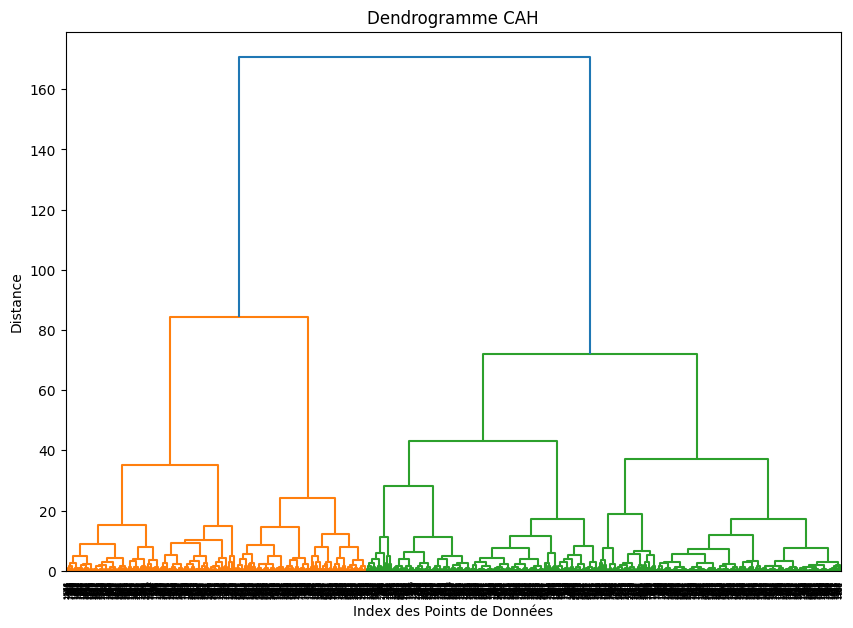

In [32]:
linked = linkage(df_pca.iloc[:, :best_n_components], 'ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogramme CAH')
plt.xlabel('Index des Points de Données')
plt.ylabel('Distance')
plt.show()

Evaluation des clusters avec le score de silhouette

In [33]:
print(f'Best Silhouette Score: {best_score}')

Best Silhouette Score: 0.49943851548175283


Application algorithme DBSCAN

Silhouette Score pour DBSCAN: 0.13768769483820728


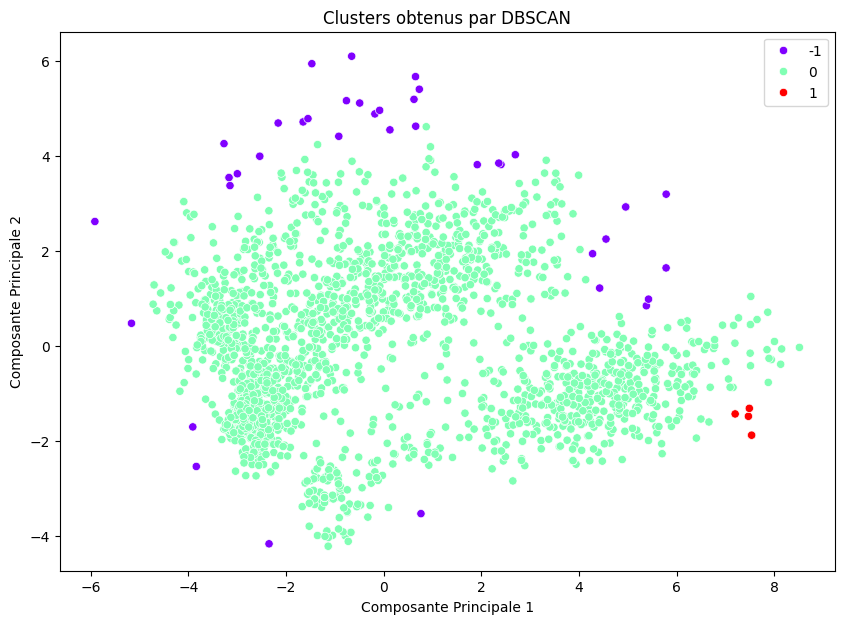

In [34]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

eps = 0.5  # Rayon du voisinage
min_samples = 5  # Nombre minimum de points dans un voisinage pour être un noyau

# Initialisation de DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Fit et prédiction des clusters
labels = dbscan.fit_predict(principal_components)

# Évaluation avec le score de silhouette
silhouette = silhouette_score(principal_components, labels)
print(f'Silhouette Score pour DBSCAN: {silhouette}')

# Visualisation des clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue=labels, palette='rainbow', data=df_pca)
plt.title('Clusters obtenus par DBSCAN')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.show()